# Practical Assignment: Binary Classification using Logistic Regression, Neural Networks, and Random Forest

### Problem Statement
In this assignment, you'll predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification, employing techniques you've learned:
- Logistic Regression
- Neural Networks
- Random Forest

### Dataset Description
The dataset used is the [Heart Disease UCI dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics


In [1]:
try:
    import tensorflow
    print("TensorFlow is already installed.")
except ImportError:
    print("TensorFlow not found. Installing...")
    import os
    os.system('pip install tensorflow')
    import tensorflow
    print("TensorFlow has been installed.")

2025-05-25 19:29:09.028441: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 19:29:09.030235: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 19:29:09.033512: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 19:29:09.041992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748201349.056047   21676 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748201349.06

TensorFlow is already installed.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model


In [3]:
# Load the dataset
url = "heart.csv"
df = pd.read_csv(url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
cp: [3 2 1 0]
trestbps: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs: [1 0]

## Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

In [7]:
# The 'ca' column represents the number of major vessels (0-3) colored by fluoroscopy.
# In this dataset, the value 4 is not a valid category and is likely an encoding or data entry issue.
# We replace all occurrences of 4 with 3 to ensure the feature only contains valid categories (0, 1, 2, 3).
df['ca'] = df['ca'].replace(4, 3)

In [8]:
# Check if there are any rows where 'thal' is 0 (which may represent missing or invalid data)
if (df['thal'] == 0).sum() > 0:
    mode_thal = df['thal'].mode()[0]
    df['thal'] = df['thal'].replace(0, mode_thal)

In [9]:
cat_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [10]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
                     

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
df_encoded.shape

(303, 21)

In [14]:
log_reg = LogisticRegression(solver="liblinear",max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [15]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [16]:
# Calculate probabilities for ROC curve
y_train_prob = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [17]:
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1': report['1']['f1-score']
    }

In [18]:
train_metrics = get_metrics(y_train, y_train_pred)
test_metrics = get_metrics(y_test, y_test_pred)
print("Training Metrics:", train_metrics)
print("Testing Metrics:", test_metrics)

Training Metrics: {'accuracy': 0.8820754716981132, 'precision': 0.8813559322033898, 'recall': 0.9043478260869565, 'f1': 0.8927038626609443}
Testing Metrics: {'accuracy': 0.8571428571428571, 'precision': 0.8627450980392157, 'recall': 0.88, 'f1': 0.8712871287128713}


Text(120.72222222222221, 0.5, 'Actual')

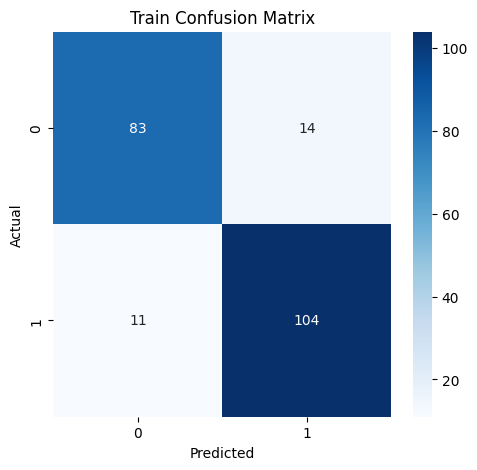

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

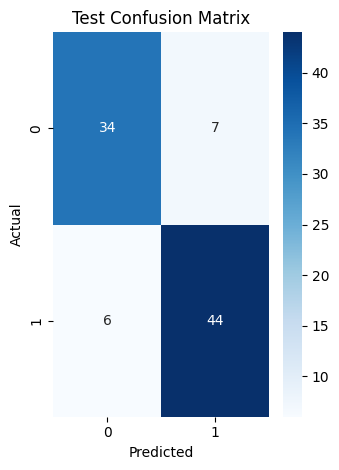

In [20]:
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

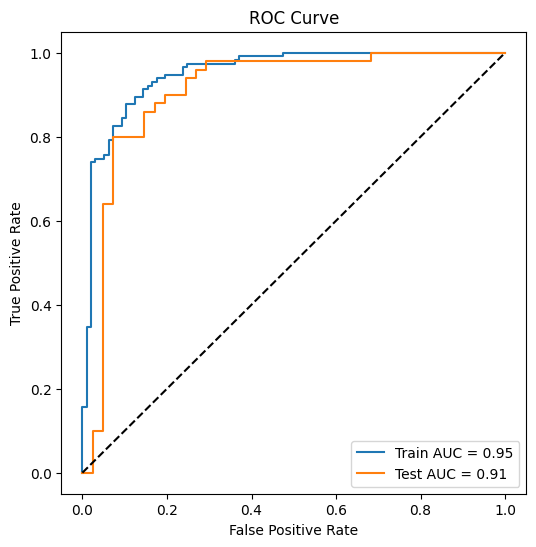

In [21]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc(fpr_train, tpr_train):.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc(fpr_test, tpr_test):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

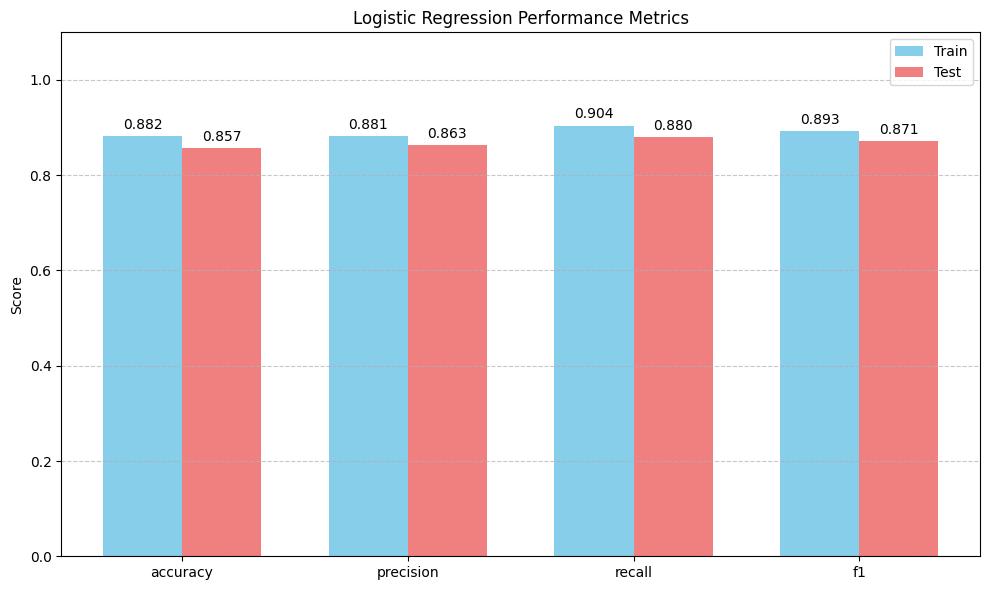

In [22]:
metrics = list(train_metrics.keys())
train_scores = [train_metrics[m] for m in metrics]
test_scores = [test_metrics[m] for m in metrics]

# Create bar plot
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='lightcoral')

# Add values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

ax.set_ylabel('Score')
ax.set_title('Logistic Regression Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1.1)  # Set y-axis limit to accommodate annotations
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch (Hint: Use History)
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Add more cells as required.

In [23]:
# X = df_encoded.drop('target', axis=1)
# y = df_encoded['target']

In [24]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [25]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [26]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-25 19:29:12.744613: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [31]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5598 - loss: 0.7153 - val_accuracy: 0.5495 - val_loss: 0.6769
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5124 - loss: 0.6932 - val_accuracy: 0.5604 - val_loss: 0.6490
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5782 - loss: 0.6180 - val_accuracy: 0.5604 - val_loss: 0.6156
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5875 - loss: 0.5905 - val_accuracy: 0.5604 - val_loss: 0.5884
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5807 - loss: 0.5785 - val_accuracy: 0.6264 - val_loss: 0.5652
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6395 - loss: 0.5467 - val_accuracy: 0.6593 - val_loss: 0.5444
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7101 - loss: 0.5112 - val_accuracy: 0.7363 - val_loss: 0.5301
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7508 - loss: 0.5073 - val_accuracy: 0.7802 - val_loss: 0.

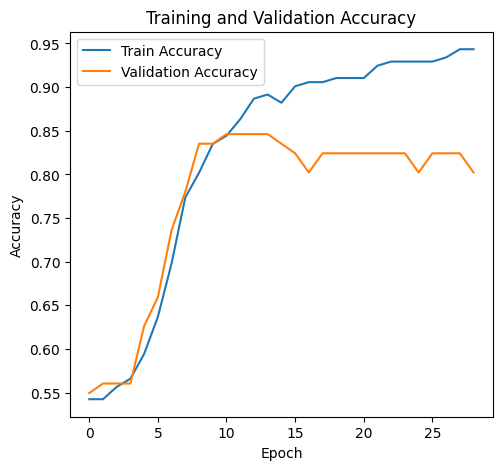

In [32]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

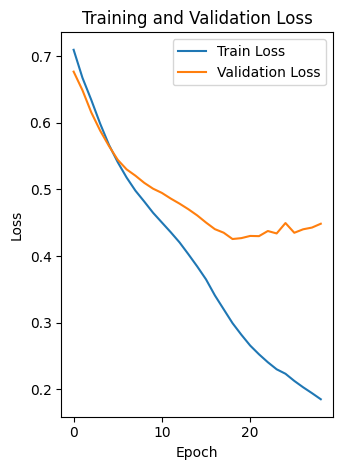

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
y_train_pred_prob = model.predict(X_train_scaled).flatten()
y_test_pred_prob = model.predict(X_test_scaled).flatten()
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [35]:
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

train_metrics = {
    'accuracy': train_report['accuracy'],
    'precision': train_report['1']['precision'],
    'recall': train_report['1']['recall'],
    'f1': train_report['1']['f1-score']
}

test_metrics = {
    'accuracy': test_report['accuracy'],
    'precision': test_report['1']['precision'],
    'recall': test_report['1']['recall'],
    'f1': test_report['1']['f1-score']
}

In [36]:
print("\nTraining Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Training Metrics:
Accuracy: 0.9104
Precision: 0.9211
Recall: 0.9130
F1: 0.9170

Test Metrics:
Accuracy: 0.8242
Precision: 0.8696
Recall: 0.8000
F1: 0.8333


In [37]:
print("\nDetailed Classification Reports:")
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Detailed Classification Reports:

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        97
           1       0.92      0.91      0.92       115

    accuracy                           0.91       212
   macro avg       0.91      0.91      0.91       212
weighted avg       0.91      0.91      0.91       212


Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.87      0.80      0.83        50

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



Text(120.72222222222221, 0.5, 'True Label')

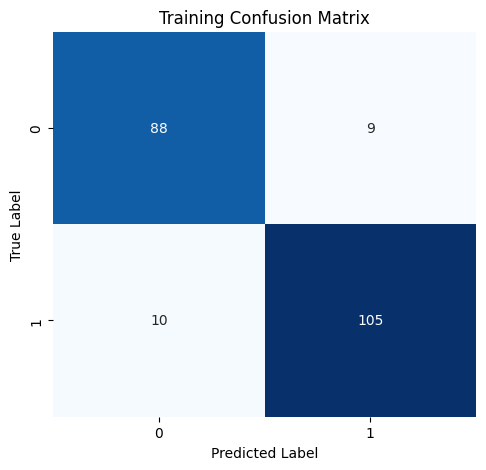

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

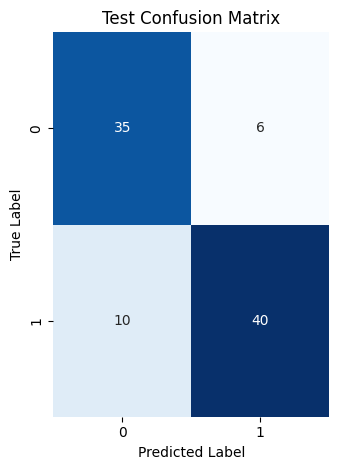

In [39]:
plt.subplot(1, 2, 2)
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

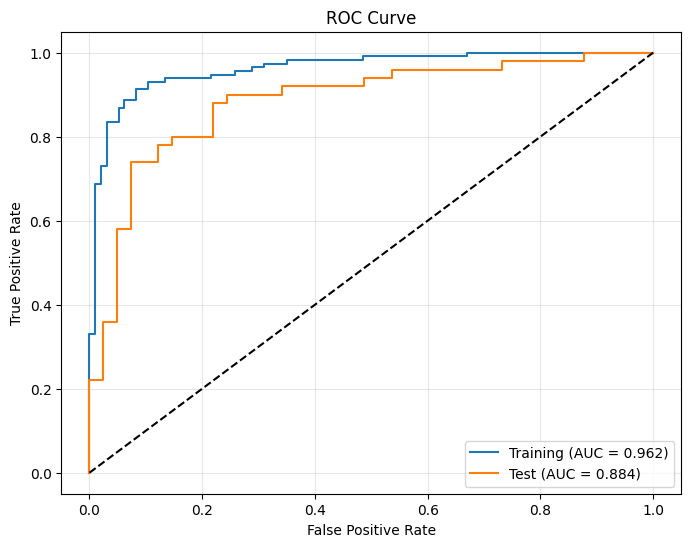

In [40]:
plt.figure(figsize=(8, 6))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_train:.3f})')

# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Random Forest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics
- Visualize the Training and Test Performance Metrics
- Identify the most important features
- Train the model on top 5 features, does it perform better than the model trained with all the features?
- Add more cells as required.

In [41]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [42]:
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate probabilities for ROC curve
y_train_prob = rf_model.predict_proba(X_train)[:, 1]
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

In [43]:
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [44]:
train_metrics = {
    'accuracy': train_report['accuracy'],
    'precision': train_report['1']['precision'],
    'recall': train_report['1']['recall'],
    'f1': train_report['1']['f1-score']
}

In [45]:
test_metrics = {
    'accuracy': test_report['accuracy'],
    'precision': test_report['1']['precision'],
    'recall': test_report['1']['recall'],
    'f1': test_report['1']['f1-score']
}

In [46]:
print("\nRandom Forest Model with All Features")
print("\nTraining Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Random Forest Model with All Features

Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Test Metrics:
Accuracy: 0.8132
Precision: 0.8235
Recall: 0.8400
F1: 0.8317


In [47]:
print("\nDetailed Classification Reports:")
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Detailed Classification Reports:

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Text(120.72222222222221, 0.5, 'True Label')

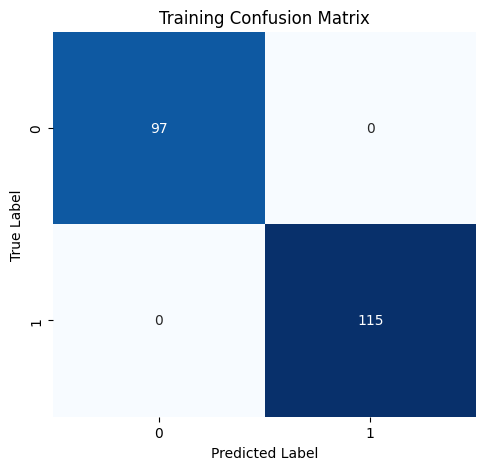

In [48]:
# Confusion Matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

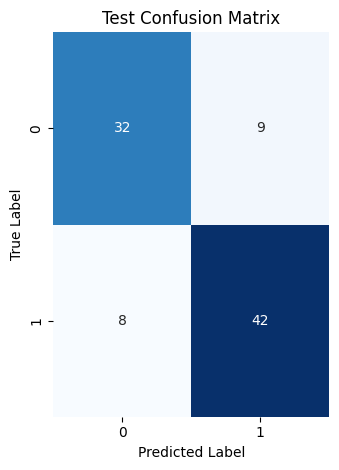

In [49]:
plt.subplot(1, 2, 2)
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

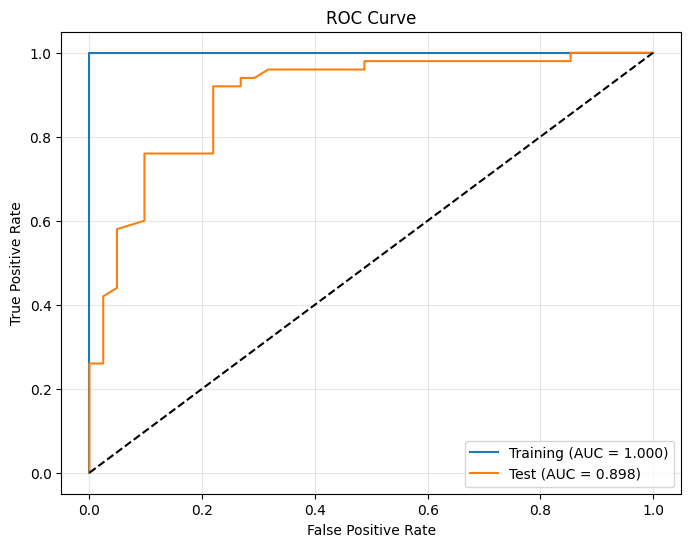

In [50]:
# ROC Curves
plt.figure(figsize=(8, 6))

# Training ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_train:.3f})')

# Test ROC
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_test:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

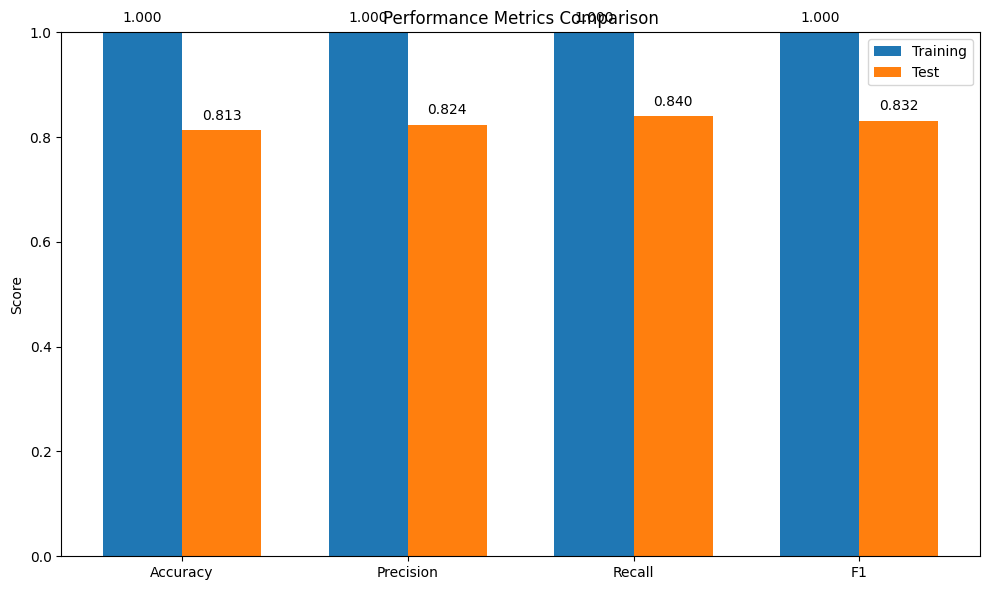

In [51]:
# Performance Metrics Comparison
plt.figure(figsize=(10, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
train_scores = [train_metrics[m] for m in metrics]
test_scores = [test_metrics[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training')
plt.bar(x + width/2, test_scores, width, label='Test')
plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.ylim(0, 1.0)

for i, v in enumerate(train_scores):
    plt.text(i - width/2, v + 0.02, f'{v:.3f}', ha='center')
    
for i, v in enumerate(test_scores):
    plt.text(i + width/2, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

In [52]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

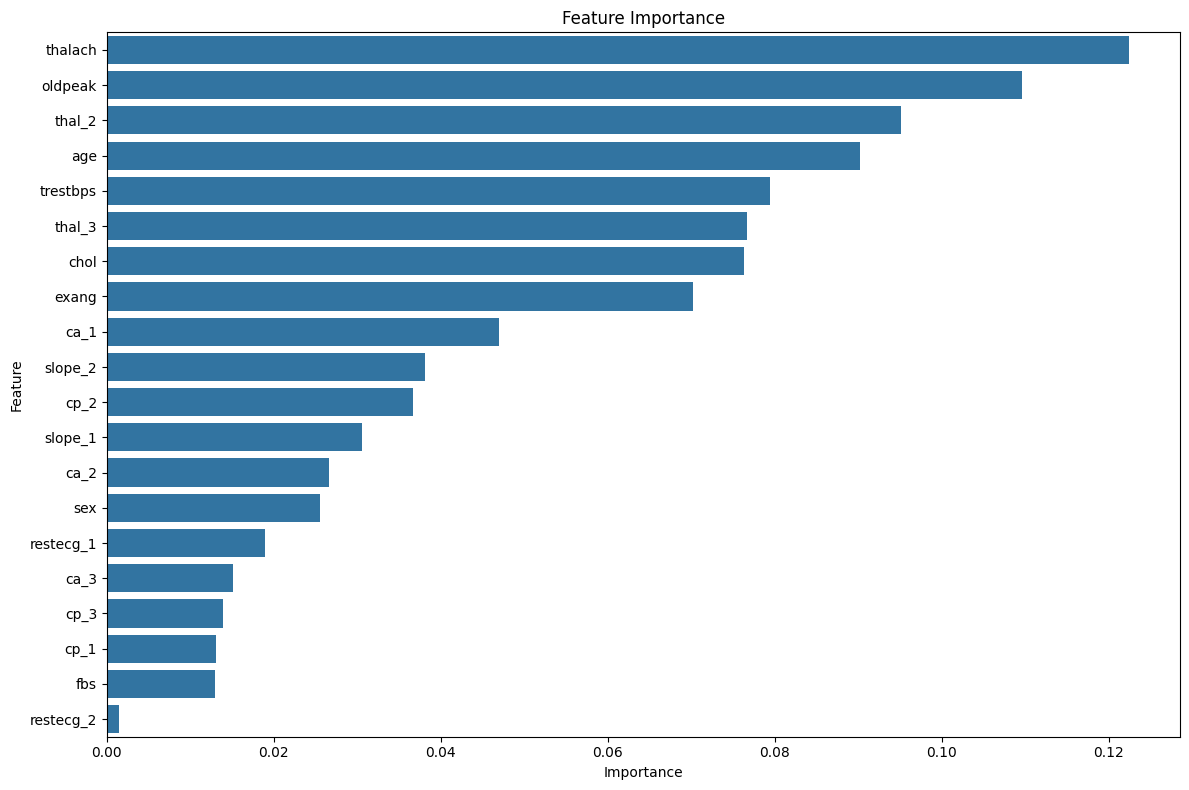

In [53]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [54]:
print("\nTop 5 Most Important Features:")
top_5_features = feature_importance.head(5)['Feature'].tolist()
print(top_5_features)


Top 5 Most Important Features:
['thalach', 'oldpeak', 'thal_2', 'age', 'trestbps']


In [55]:
# Train model with only top 5 features
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

rf_model_top5 = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [56]:
rf_model_top5.fit(X_train_top5, y_train)

# Make predictions with top 5 features model
y_train_pred_top5 = rf_model_top5.predict(X_train_top5)
y_test_pred_top5 = rf_model_top5.predict(X_test_top5)

In [57]:
# Calculate metrics for top 5 features model
train_report_top5 = classification_report(y_train, y_train_pred_top5, output_dict=True)
test_report_top5 = classification_report(y_test, y_test_pred_top5, output_dict=True)

train_metrics_top5 = {
    'accuracy': train_report_top5['accuracy'],
    'precision': train_report_top5['1']['precision'],
    'recall': train_report_top5['1']['recall'],
    'f1': train_report_top5['1']['f1-score']
}

test_metrics_top5 = {
    'accuracy': test_report_top5['accuracy'],
    'precision': test_report_top5['1']['precision'],
    'recall': test_report_top5['1']['recall'],
    'f1': test_report_top5['1']['f1-score']
}

In [58]:
print("\nRandom Forest Model with Top 5 Features")
print("\nTraining Metrics (Top 5 Features):")
for metric, value in train_metrics_top5.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nTest Metrics (Top 5 Features):")
for metric, value in test_metrics_top5.items():
    print(f"{metric.capitalize()}: {value:.4f}")


Random Forest Model with Top 5 Features

Training Metrics (Top 5 Features):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Test Metrics (Top 5 Features):
Accuracy: 0.7692
Precision: 0.8372
Recall: 0.7200
F1: 0.7742


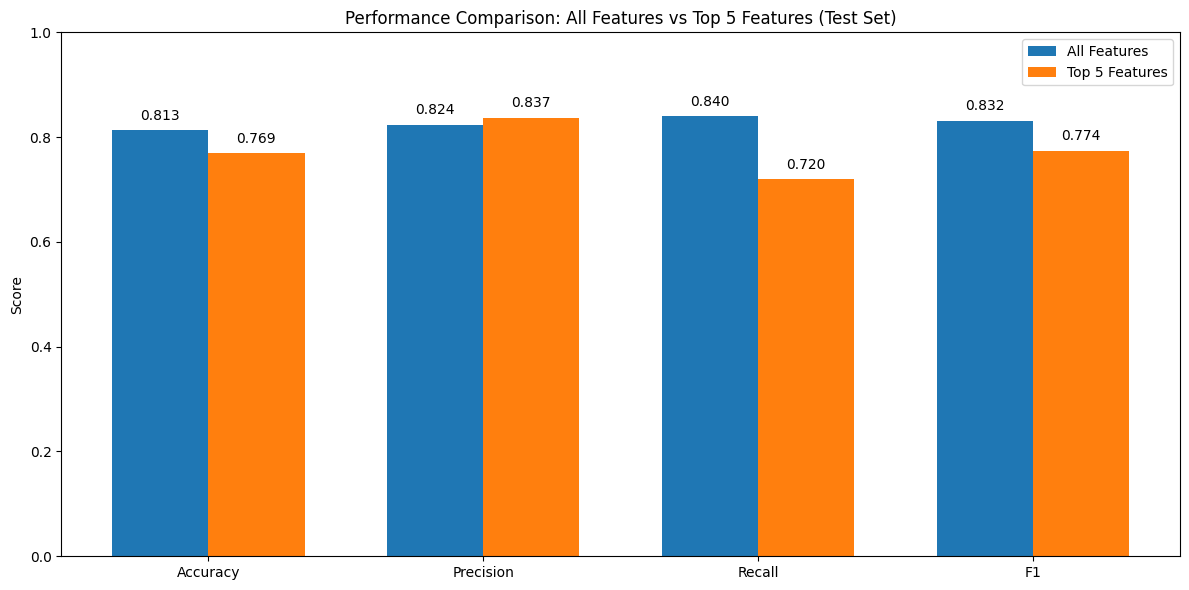

In [59]:
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1']
test_scores_full = [test_metrics[m] for m in metrics]
test_scores_top5 = [test_metrics_top5[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, test_scores_full, width, label='All Features')
plt.bar(x + width/2, test_scores_top5, width, label='Top 5 Features')
plt.xticks(x, [m.capitalize() for m in metrics])
plt.ylabel('Score')
plt.title('Performance Comparison: All Features vs Top 5 Features (Test Set)')
plt.legend()
plt.ylim(0, 1.0)

for i, v in enumerate(test_scores_full):
    plt.text(i - width/2, v + 0.02, f'{v:.3f}', ha='center')
    
for i, v in enumerate(test_scores_top5):
    plt.text(i + width/2, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

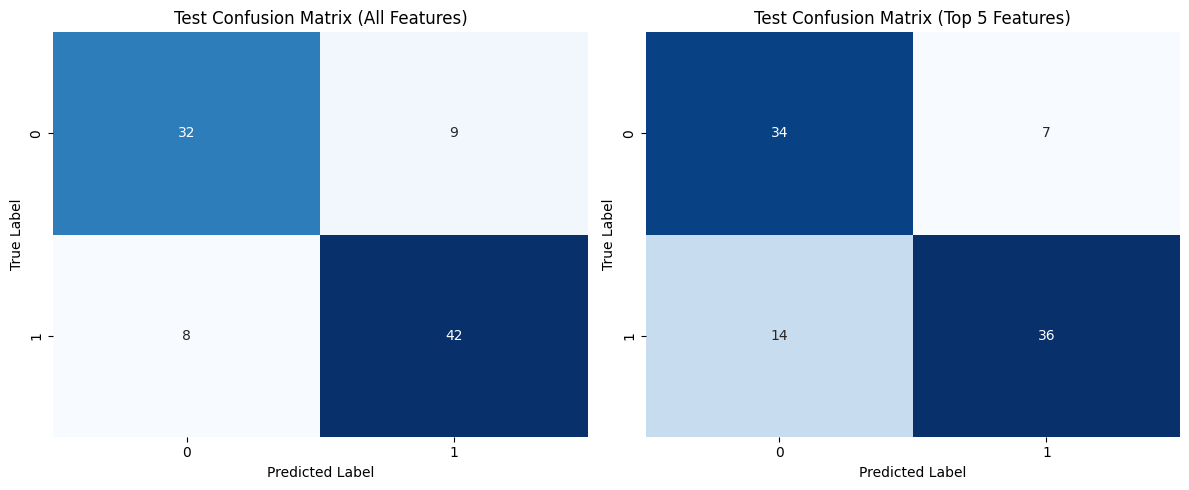

In [60]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
test_cm_full = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm_full, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix (All Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
test_cm_top5 = confusion_matrix(y_test, y_test_pred_top5)
sns.heatmap(test_cm_top5, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix (Top 5 Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()